/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



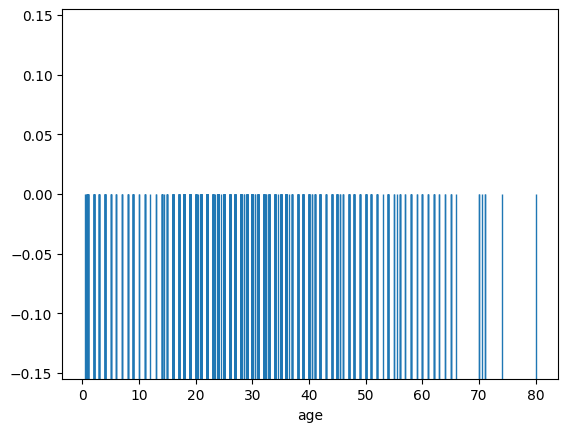

In [37]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
import plotly.express as px
import numpy as np

titanic['log_fare'] = np.log(titanic['fare'])
sns.rugplot(titanic['age'],height = 0.5);

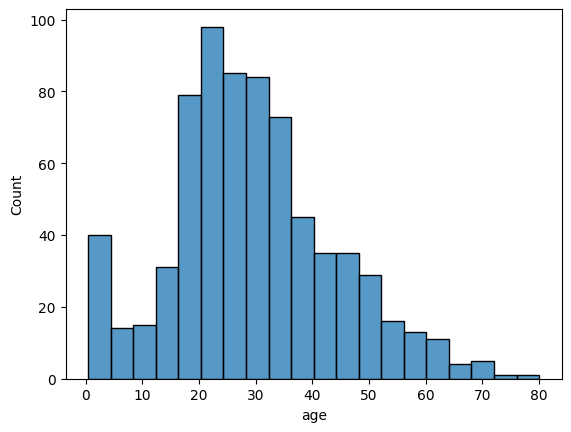

In [2]:
sns.histplot(titanic['age']);

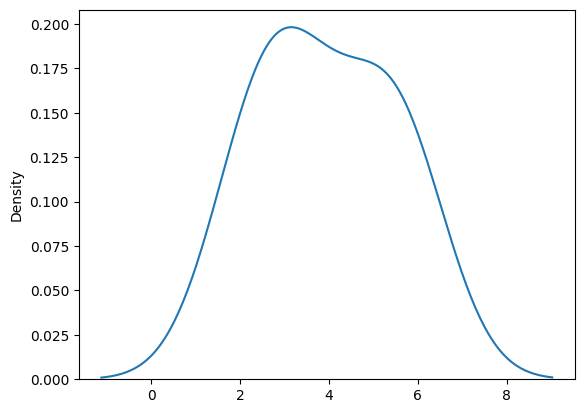

In [44]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]
sns.kdeplot(points);

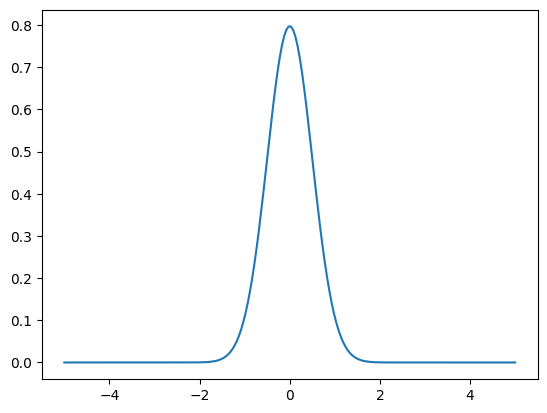

In [18]:
import numpy as np
import matplotlib.pyplot as plt 

def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

xs = np.linspace(-5, 5, 200)
alpha = .5
kde_curve = [gaussian_kernel(alpha, x, 0) for x in xs]
plt.plot(xs, kde_curve);

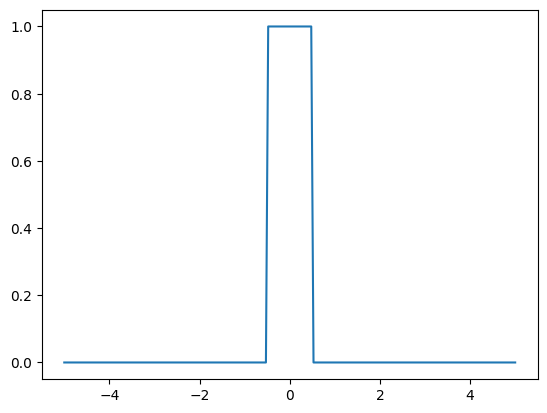

In [19]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

xs = np.linspace(-5, 5, 200)
alpha=1
kde_curve = [boxcar_kernel(alpha, x, 0) for x in xs]
plt.plot(xs, kde_curve);

In [41]:
def gaussian(x, z, a):
    # Gaussian kernel
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

def boxcar_basic(x, z, a):
    # Boxcar kernel
    if np.abs(x - z) <= a/2:
        return 1/a
    return 0

def boxcar(x, z, a):
    # Boxcar kernel
    cond = np.abs(x - z)
    return np.piecewise(x, [cond <= a/2, cond > a/2], [1/a, 0] )

In [48]:
def create_kde(kernel, pts, a):
    # Takes in a kernel, set aof points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y);
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        plt.plot(x, y)
    
    plt.show();

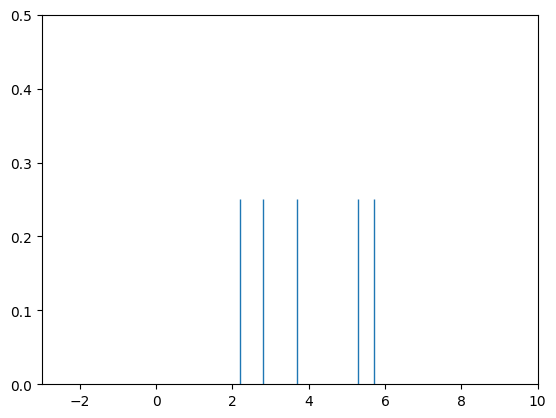

In [49]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height = 0.5);

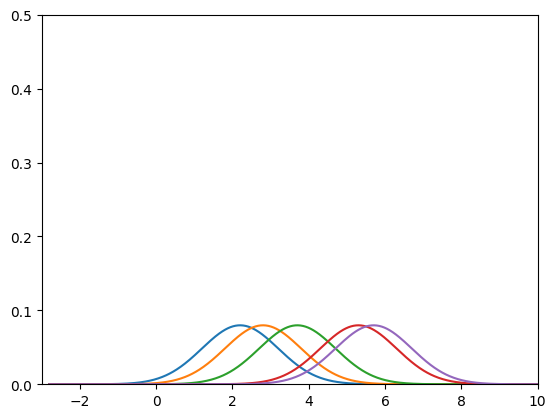

In [53]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1, norm=True);

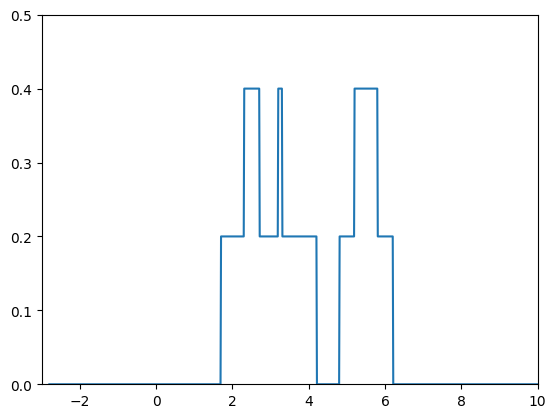

In [57]:

plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_kde(boxcar, points, a = 1)

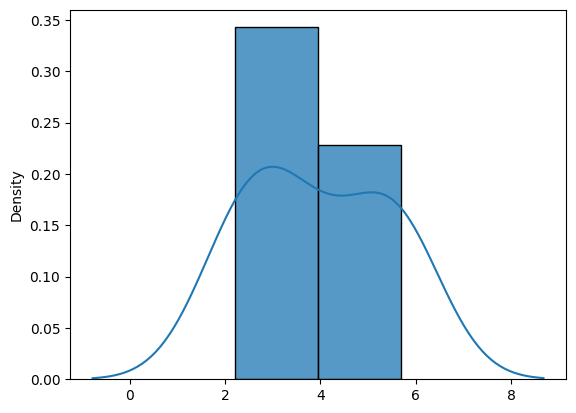

In [56]:

sns.kdeplot(points, bw_method=0.65)  # magic value!
sns.histplot(points, stat='density', bins=2);

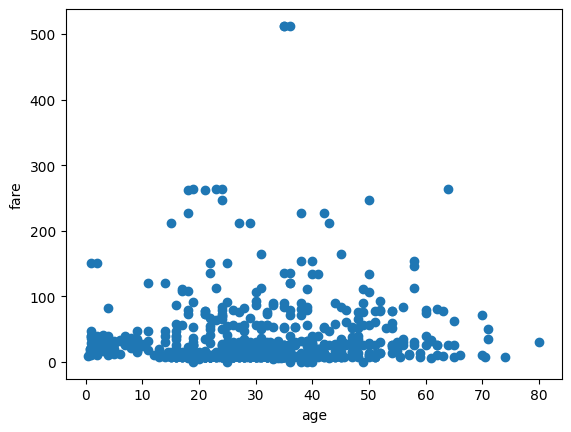

In [21]:
import pandas as pd

# Matplotlib Example
plt.scatter(titanic['age'], titanic['fare'])
plt.xlabel('age')
plt.ylabel('fare');

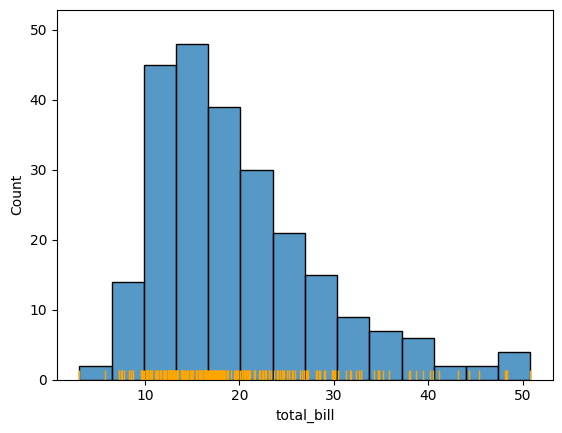

In [60]:

tips = sns.load_dataset('tips')
vals = tips['total_bill']
ax = sns.histplot(vals)
sns.rugplot(vals, color='orange', ax=ax);

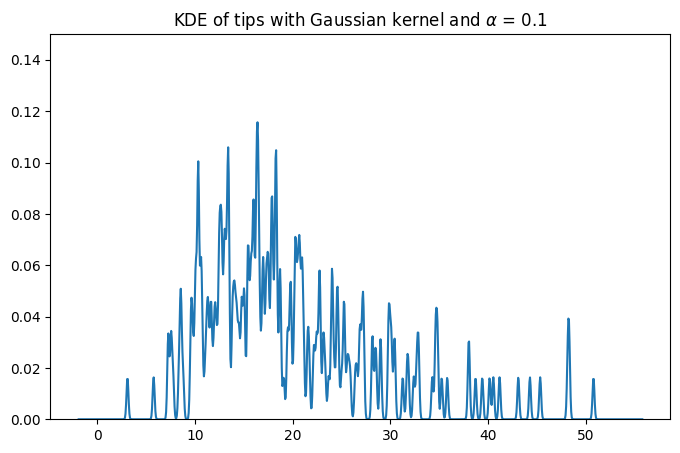

In [63]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.15)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plot_kde(gaussian, vals, a = .1)

<Axes: xlabel='age', ylabel='fare'>

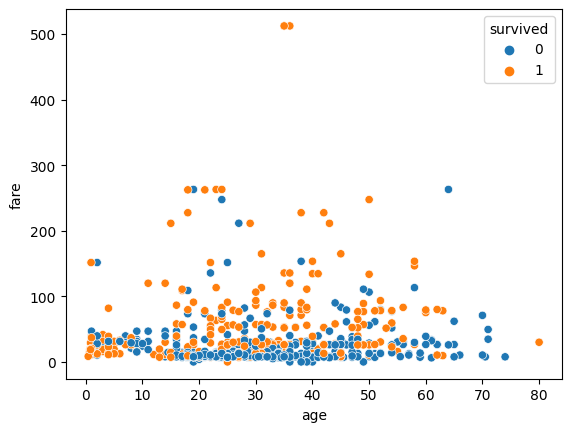

In [22]:
# Seaborn Example
sns.scatterplot(data = titanic, x = 'age', y = 'fare',
                hue = 'survived')

In [25]:
import plotly.graph_objects as go

colors = {0: 'red', 1: 'green'}

fig = go.Figure(data=go.Scatter(x=titanic['age'], y=titanic['fare'], mode='markers',
                               marker=dict(color=titanic['survived'].map(colors))))
fig.show()



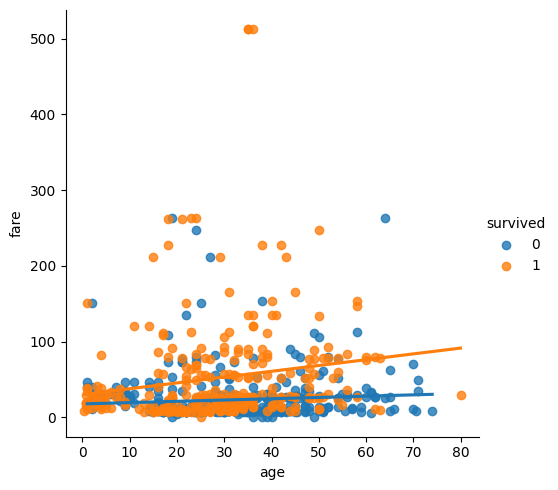

In [26]:
sns.lmplot(data = titanic, x = 'age', y = 'fare', 
           hue = 'survived', ci = False);

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:4575: RuntimeWarning:

invalid value encountered in multiply



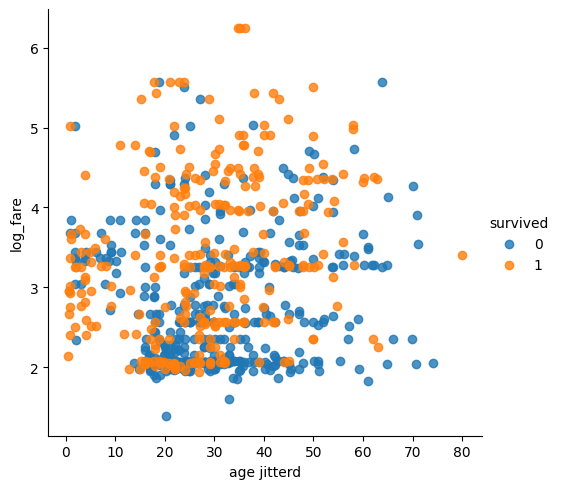

In [40]:
titanic = pd.DataFrame(titanic)
titanic['age jitterd'] = titanic["age"] + np.random.uniform(-0.2, 0.2, len(titanic))
sns.lmplot(data = titanic, x = 'age jitterd', y = 'log_fare', 
           hue = 'survived', ci = False);

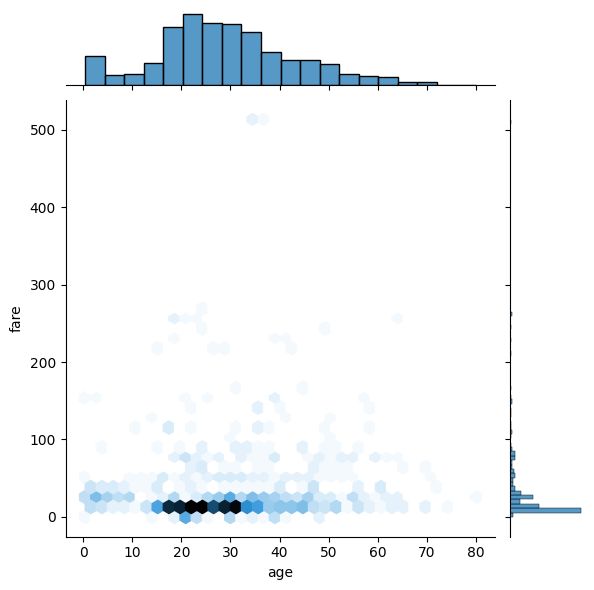

In [35]:
sns.jointplot(data = titanic, x = 'age', 
              y = 'fare', kind = 'hex')

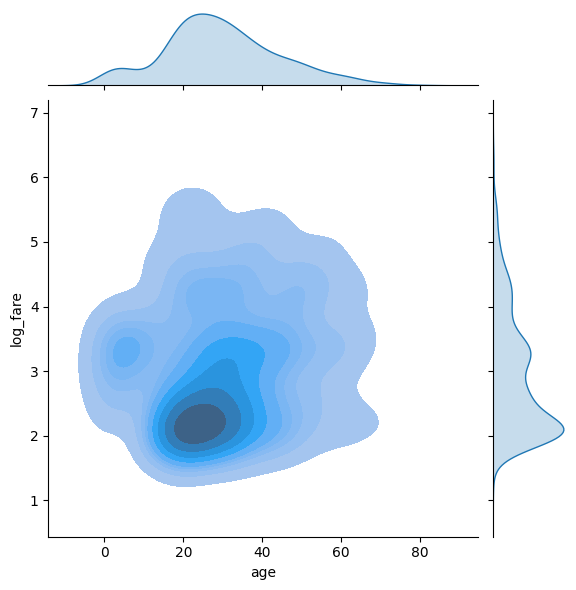

In [39]:
sns.jointplot(data = titanic, x = 'age', 
              y = 'log_fare',  kind = 'kde', fill = True)
